# LightGBM

## Base LightGBM

In [17]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df = pd.read_csv('../data/interim/data_cleaned.csv')

TARGET = 'exam_score'

X = df.drop(columns=[TARGET])
y = df[TARGET]

cat_cols = [
    'gender',
    'course',
    'internet_access',
    'sleep_quality',
    'study_method',
    'facility_rating',
    'exam_difficulty'
]

for col in cat_cols:
    X[col] = X[col].astype('category')


print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Train: {X_train.shape}")
print(f"Valid: {X_valid.shape}")

# Train LightGBM
lgbm = lgb.LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    num_leaves=127,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=20,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgbm.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(100, verbose=True),
        lgb.log_evaluation(50)
    ]
)

print(f"\nBest iteration: {lgbm.best_iteration_}")
print(f"Best score: {lgbm.best_score_['valid_1']['rmse']:.4f}")

# Evaluate
y_train_pred = lgbm.predict(X_train)
y_valid_pred = lgbm.predict(X_valid)

print("\n" + "="*50)
print("TRAIN METRICS:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"R2:   {r2_score(y_train, y_train_pred):.4f}")

print("\nVALID METRICS:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_valid, y_valid_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_valid, y_valid_pred):.4f}")
print(f"R2:   {r2_score(y_valid, y_valid_pred):.4f}")

Features: (630000, 11)
Target: (630000,)
Train: (504000, 11)
Valid: (126000, 11)
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 11.3606	training's l2: 129.062	valid_1's rmse: 11.3375	valid_1's l2: 128.539
[100]	training's rmse: 9.35728	training's l2: 87.5587	valid_1's rmse: 9.36763	valid_1's l2: 87.7525
[150]	training's rmse: 8.89737	training's l2: 79.1632	valid_1's rmse: 8.92556	valid_1's l2: 79.6656
[200]	training's rmse: 8.77725	training's l2: 77.0402	valid_1's rmse: 8.81914	valid_1's l2: 77.7773
[250]	training's rmse: 8.73174	training's l2: 76.2433	valid_1's rmse: 8.78686	valid_1's l2: 77.2088
[300]	training's rmse: 8.70564	training's l2: 75.7881	valid_1's rmse: 8.7736	valid_1's l2: 76.976
[350]	training's rmse: 8.68585	training's l2: 75.444	valid_1's rmse: 8.76658	valid_1's l2: 76.853
[400]	training's rmse: 8.66929	training's l2: 75.1566	valid_1's rmse: 8.76255	valid_1's l2: 76.7823
[450]	training's rmse: 8.65405	training's l2: 74.8926	valid_1'

In [2]:
# Feature Importance
feature_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': lgbm.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_imp.head(10).to_string(index=False))

# import joblib
# joblib.dump(lgbm, '../models/lgbm_base.pkl')


Top 10 Important Features:
         feature  importance
class_attendance       36768
     study_hours       36182
     sleep_hours       29751
          course       13301
             age       12799
    study_method       11666
   sleep_quality       10621
 facility_rating       10458
          gender        8001
 exam_difficulty        7150


['../models/lgbm_base.pkl']

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

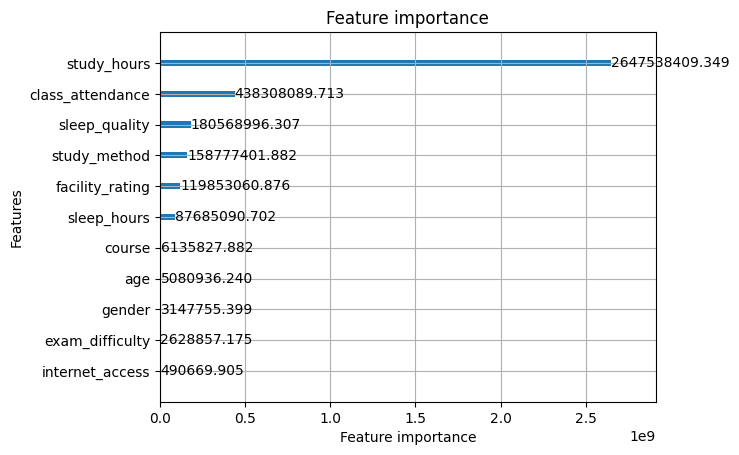

In [6]:
lgb.plot_importance(lgbm, importance_type="gain")

In [25]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


df = pd.read_csv('../data/interim/data_cleaned.csv')

TARGET = 'exam_score'


DROP_COLS = [
    'id',
    'age',
    'gender',
    'internet_access'
]

df = df.drop(columns=DROP_COLS, errors='ignore')


X = df.drop(columns=[TARGET])
y = df[TARGET]


cat_cols = [
    'course',
    'sleep_quality',
    'study_method',
    'facility_rating',
    'exam_difficulty'
]

for col in cat_cols:
    X[col] = X[col].astype('category')

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("Features used:", list(X.columns))


X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Train: {X_train.shape}")
print(f"Valid: {X_valid.shape}")


lgbm = lgb.LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    num_leaves=63,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=40,
    reg_alpha=0.2,
    reg_lambda=0.3,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)


lgbm.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(100, verbose=True),
        lgb.log_evaluation(50)
    ]
)

print(f"\nBest iteration: {lgbm.best_iteration_}")
print(f"Best RMSE (valid): {lgbm.best_score_['valid_1']['rmse']:.4f}")


y_train_pred = lgbm.predict(X_train)
y_valid_pred = lgbm.predict(X_valid)

print("\n" + "="*50)
print("TRAIN METRICS:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"R2:   {r2_score(y_train, y_train_pred):.4f}")

print("\nVALID METRICS:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_valid, y_valid_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_valid, y_valid_pred):.4f}")
print(f"R2:   {r2_score(y_valid, y_valid_pred):.4f}")

Features shape: (630000, 8)
Target shape: (630000,)
Features used: ['course', 'study_hours', 'class_attendance', 'sleep_hours', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
Train: (504000, 8)
Valid: (126000, 8)
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 11.9035	training's l2: 141.693	valid_1's rmse: 11.8721	valid_1's l2: 140.946
[100]	training's rmse: 9.68065	training's l2: 93.7149	valid_1's rmse: 9.67418	valid_1's l2: 93.5898
[150]	training's rmse: 9.02077	training's l2: 81.3743	valid_1's rmse: 9.02806	valid_1's l2: 81.5059
[200]	training's rmse: 8.84363	training's l2: 78.2098	valid_1's rmse: 8.85806	valid_1's l2: 78.4652
[250]	training's rmse: 8.79009	training's l2: 77.2656	valid_1's rmse: 8.81048	valid_1's l2: 77.6245
[300]	training's rmse: 8.76548	training's l2: 76.8336	valid_1's rmse: 8.79142	valid_1's l2: 77.2892
[350]	training's rmse: 8.75015	training's l2: 76.5651	valid_1's rmse: 8.78133	valid_1's l2: 77.1118
[4

In [26]:
import joblib
joblib.dump(lgbm, '../models/lgbm_model.pkl')

['../models/lgbm_model.pkl']

## LightGBM with FE

In [24]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

train_df = pd.read_csv('../data/processed/dataset_train.csv')

TARGET = 'exam_score'

X = train_df.drop(columns=[TARGET])
y = train_df[TARGET]


X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Valid shape: {X_valid.shape}")


lgbm = lgb.LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    num_leaves=63,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=40,
    reg_alpha=0.2,
    reg_lambda=0.3,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)


lgbm.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(100, verbose=True),
        lgb.log_evaluation(50)
    ]
)

print(f"\nBest iteration: {lgbm.best_iteration_}")
print(f"Best RMSE (valid): {lgbm.best_score_['valid_1']['rmse']:.4f}")

y_train_pred = lgbm.predict(X_train)
y_valid_pred = lgbm.predict(X_valid)

print("\n" + "="*50)
print("TRAIN METRICS:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"R2:   {r2_score(y_train, y_train_pred):.4f}")

print("\nVALID METRICS:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_valid, y_valid_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_valid, y_valid_pred):.4f}")
print(f"R2:   {r2_score(y_valid, y_valid_pred):.4f}")

Train shape: (504000, 21)
Valid shape: (126000, 21)
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 11.3751	training's l2: 129.392	valid_1's rmse: 11.3452	valid_1's l2: 128.713
[100]	training's rmse: 9.48586	training's l2: 89.9815	valid_1's rmse: 9.48102	valid_1's l2: 89.8896
[150]	training's rmse: 9.01768	training's l2: 81.3185	valid_1's rmse: 9.0252	valid_1's l2: 81.4543
[200]	training's rmse: 8.87671	training's l2: 78.7959	valid_1's rmse: 8.89051	valid_1's l2: 79.0412
[250]	training's rmse: 8.82527	training's l2: 77.8853	valid_1's rmse: 8.84417	valid_1's l2: 78.2193
[300]	training's rmse: 8.79867	training's l2: 77.4166	valid_1's rmse: 8.82258	valid_1's l2: 77.8379
[350]	training's rmse: 8.78108	training's l2: 77.1073	valid_1's rmse: 8.81037	valid_1's l2: 77.6227
[400]	training's rmse: 8.76546	training's l2: 76.8333	valid_1's rmse: 8.80033	valid_1's l2: 77.4458
[450]	training's rmse: 8.75188	training's l2: 76.5955	valid_1's rmse: 8.79212	valid_1's 

In [20]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ===============================
# 1️⃣ LOAD PROCESSED DATA
# ===============================
train_df = pd.read_csv('../data/processed/dataset_train.csv')

TARGET = 'exam_score'

print("Dataset shape:", train_df.shape)
print("Columns:", list(train_df.columns))

# ===============================
# 2️⃣ SPLIT X / y
# ===============================
X = train_df.drop(columns=[TARGET])
y = train_df[TARGET]

# ===============================
# 3️⃣ TRAIN / VALID SPLIT
# ===============================
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Valid shape: {X_valid.shape}")

# ===============================
# 4️⃣ MODEL
# ===============================
lgbm = lgb.LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    num_leaves=63,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=40,
    reg_alpha=0.2,
    reg_lambda=0.3,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

# ===============================
# 5️⃣ TRAIN
# ===============================
lgbm.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(100, verbose=True),
        lgb.log_evaluation(50)
    ]
)

print(f"\nBest iteration: {lgbm.best_iteration_}")
print(f"Best RMSE (valid): {lgbm.best_score_['valid_1']['rmse']:.4f}")

# ===============================
# 6️⃣ EVALUATION
# ===============================
y_train_pred = lgbm.predict(X_train)
y_valid_pred = lgbm.predict(X_valid)

print("\n" + "="*50)
print("TRAIN METRICS:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"R2:   {r2_score(y_train, y_train_pred):.4f}")

print("\nVALID METRICS:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_valid, y_valid_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_valid, y_valid_pred):.4f}")
print(f"R2:   {r2_score(y_valid, y_valid_pred):.4f}")


Dataset shape: (630000, 14)
Columns: ['sleep_quality', 'facility_rating', 'exam_difficulty', 'study_method_group study', 'study_method_mixed', 'study_method_online videos', 'study_method_self-study', 'course_b.sc', 'course_b.tech', 'course_ba', 'course_bba', 'course_bca', 'course_diploma', 'exam_score']
Train shape: (504000, 13)
Valid shape: (126000, 13)
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 17.8785	training's l2: 319.642	valid_1's rmse: 17.8122	valid_1's l2: 317.274
[100]	training's rmse: 17.6252	training's l2: 310.648	valid_1's rmse: 17.5641	valid_1's l2: 308.498
[150]	training's rmse: 17.5585	training's l2: 308.3	valid_1's rmse: 17.5013	valid_1's l2: 306.295
[200]	training's rmse: 17.5389	training's l2: 307.614	valid_1's rmse: 17.4849	valid_1's l2: 305.723
[250]	training's rmse: 17.5325	training's l2: 307.39	valid_1's rmse: 17.4809	valid_1's l2: 305.581
[300]	training's rmse: 17.53	training's l2: 307.301	valid_1's rmse: 17.48	valid_1's l

In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder


DATA_CLEAN = Path("../data/interim/data_cleaned.csv")
TEST_RAW = Path("../data/raw/test.csv")
SUBMISSION_OUT = Path("../data/processed/submission_lightgbm.csv")


DROP_COLS = ["age", "gender", "internet_access", "course", "exam_difficulty"]
TARGET = "exam_score"

NUM_BASE = ["study_hours", "class_attendance", "sleep_hours"]
CAT_ONEHOT = ["study_method"]
CAT_ORDINAL = ["sleep_quality", "facility_rating"]

train_df = pd.read_csv(DATA_CLEAN)
train_df = train_df.drop(columns=DROP_COLS)

train_df["study_attend_product"] = train_df["study_hours"] * train_df["class_attendance"]
train_df["sleep_deficit"] = 8 - train_df["sleep_hours"]

NUM_FEATURES = NUM_BASE + ["study_attend_product", "sleep_deficit"]

le_dict = {}
for col in CAT_ONEHOT + CAT_ORDINAL:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    le_dict[col] = le

X = train_df[NUM_FEATURES + CAT_ONEHOT + CAT_ORDINAL]
y = train_df[TARGET]

train_df[NUM_FEATURES + CAT_ONEHOT + CAT_ORDINAL].head()

,study_hours,class_attendance,sleep_hours,study_attend_product,sleep_deficit,study_method,sleep_quality,facility_rating
0,7.91,98.8,4.9,781.508,3.1,3,0,1
1,4.95,94.8,4.7,469.260,3.3,4,2,2
2,4.68,92.6,5.8,433.368,2.2,0,2,0
3,2.00,49.5,8.3,99.000,-0.3,1,0,0
4,7.65,86.9,9.6,664.785,-1.6,4,1,0


## Train/validation split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train: {X_train.shape}, Valid: {X_valid.shape}")

Train: (504000, 8), Valid: (126000, 8)


## Train LightGBM

In [9]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgbm = lgb.LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    num_leaves=127,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=20,
    lambda_l1=0.1,
    lambda_l2=0.1,
    min_split_gain=0.01,
    random_state=42,
)

lgbm.fit(
    X_train,
    y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="rmse",
    callbacks=[
        lgb.early_stopping(100),
        lgb.log_evaluation(50),
    ],
)

valid_pred = lgbm.predict(X_valid, num_iteration=lgbm.best_iteration_)
mse = mean_squared_error(y_valid, valid_pred)
rmse = np.sqrt(mse)
print(f"\n{'='*50}")
print(f"Validation RMSE: {rmse:.4f}")
print(f"Best iteration: {lgbm.best_iteration_}")
print(f"{'='*50}")

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Start training from score 62.482335
Training until validation scores don'

## Generate predictions for test set

In [ ]:
best_iter = lgbm.best_iteration_ or 3000

lgbm_full = lgb.LGBMRegressor(
    n_estimators=best_iter,
    learning_rate=0.02,
    num_leaves=127,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=20,
    lambda_l1=0.1,
    lambda_l2=0.1,
    min_split_gain=0.01,
    random_state=42,
)
lgbm_full.fit(X, y)

# Load and preprocess test data
test_raw = pd.read_csv(TEST_RAW)

# Drop columns
test_df = test_raw.drop(columns=DROP_COLS)

# Apply same feature engineering
test_df['study_attend_product'] = test_df['study_hours'] * test_df['class_attendance']
test_df['sleep_deficit'] = 8 - test_df['sleep_hours']

# Encode categorical features using the same encoders
for col in CAT_ONEHOT + CAT_ORDINAL:
    test_df[col] = le_dict[col].transform(test_df[col])

# Select features
X_test = test_df[NUM_FEATURES + CAT_ONEHOT + CAT_ORDINAL]

# Predict
submission = pd.DataFrame({
    "id": test_raw["id"],
    "exam_score": lgbm_full.predict(X_test),
})

SUBMISSION_OUT.parent.mkdir(parents=True, exist_ok=True)
submission.to_csv(SUBMISSION_OUT, index=False)

print(f"Submission saved to {SUBMISSION_OUT}")
submission.head()

[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 630000, number of used features: 8
[LightGBM] [Info] Start training from score 62.506672
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
Submission saved to ../data/processed

,id,exam_score
0,630000,70.416394
1,630001,70.488209
2,630002,87.612391
3,630003,57.307602
4,630004,47.541229
